In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("bitcoin_verileri.csv")
data.head(8)

,Date,Open,High,Low,Close
0,05/15/2014,436.0,445.0,436.0,444.0
1,05/16/2014,444.0,448.0,440.0,446.0
2,05/19/2014,445.0,446.0,443.0,444.0
3,05/20/2014,444.0,446.0,442.0,444.0
4,05/21/2014,444.0,494.0,443.0,483.0
5,05/22/2014,483.0,494.0,482.0,489.0
6,05/23/2014,489.0,521.0,488.0,524.0
7,05/26/2014,522.0,579.0,522.0,569.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2225 non-null   object 
 1   Open    2225 non-null   float64
 2   High    2225 non-null   float64
 3   Low     2225 non-null   float64
 4   Close   2225 non-null   float64
dtypes: float64(4), object(1)
memory usage: 87.0+ KB


In [18]:
data.describe()

,Open,High,Low,Close
count,2225.000000,2225.000000,2225.000000,2225.000000
mean,153.643721,153.720099,153.534869,153.907151
std,231.140083,231.010116,231.199237,231.664911
min,1.000000,1.001000,1.001000,1.008000
25%,6.890000,7.050000,6.696000,6.872000
50%,10.580000,10.798000,10.299000,10.609000
75%,268.000000,271.000000,264.000000,269.000000
max,999.000000,999.000000,996.000000,998.000000


In [19]:
data=data.set_index('Date')
data

,Open,High,Low,Close
Date,,,,
05/15/2014,436.000,445.000,436.000,444.000
05/16/2014,444.000,448.000,440.000,446.000
05/19/2014,445.000,446.000,443.000,444.000
05/20/2014,444.000,446.000,442.000,444.000
05/21/2014,444.000,494.000,443.000,483.000
...,...,...,...,...
05/15/2021,49.351,50.661,47.128,48.255
05/16/2021,48.266,49.812,43.893,44.062
05/17/2021,44.062,46.552,42.162,44.843


In [20]:
data.index=pd.to_datetime(data.index,format='%m/%d/%Y')

In [21]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [71]:
'''
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.plot(data.index.values,data.values[:,0:1],marker='o',color='red')
plt.xticks(rotation=90)
plt.show()
'''

"\nplt.figure(figsize=(16,8))\nplt.xlabel('Date', fontsize=20)\nplt.ylabel('Values', fontsize=20)\nplt.plot(data.index.values,data.values[:,0:1],marker='o',color='red')\nplt.xticks(rotation=90)\nplt.show()\n"

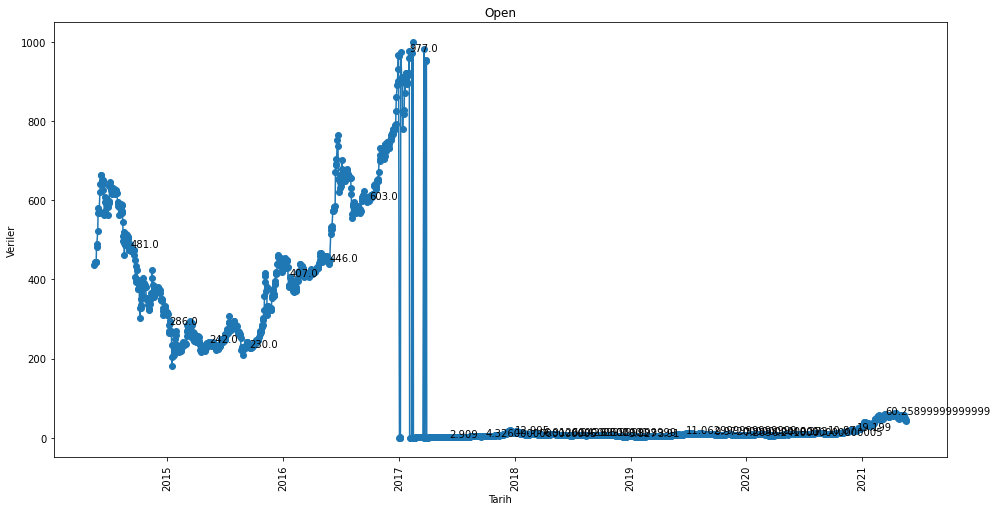

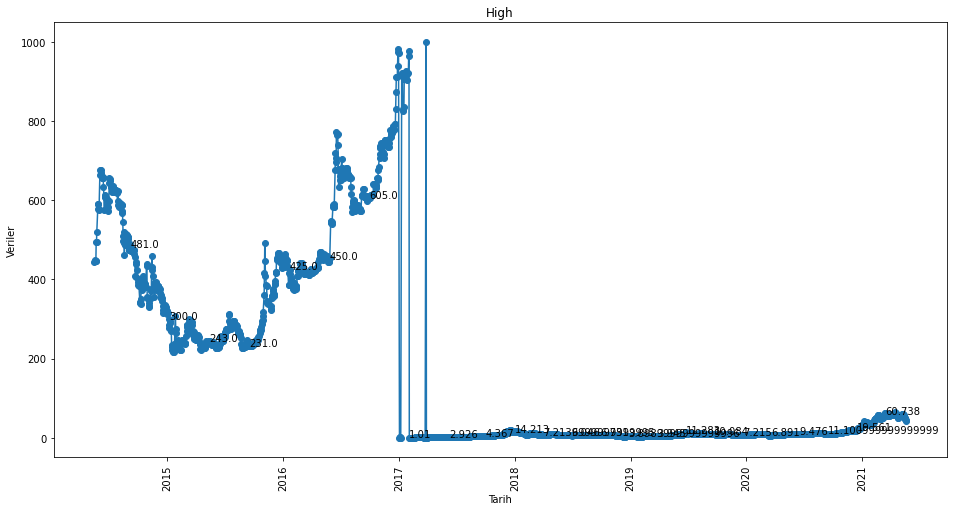

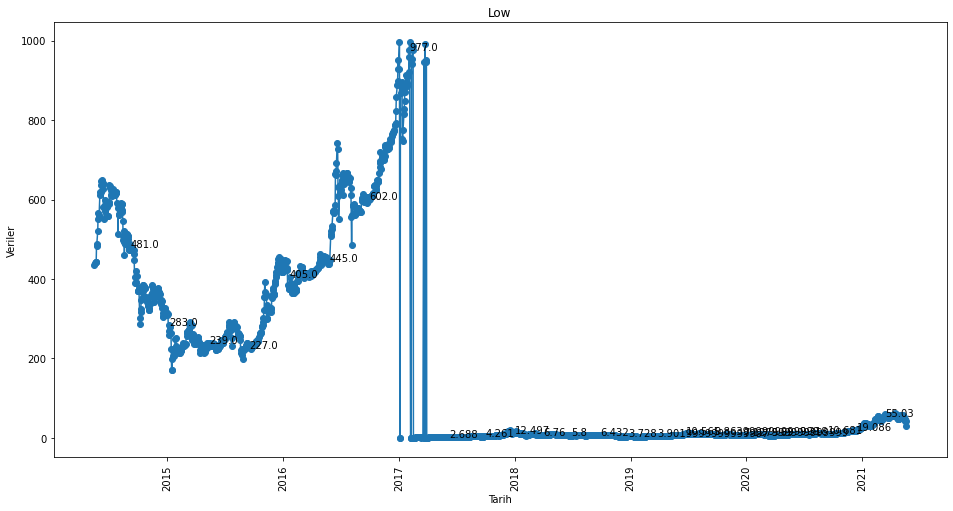

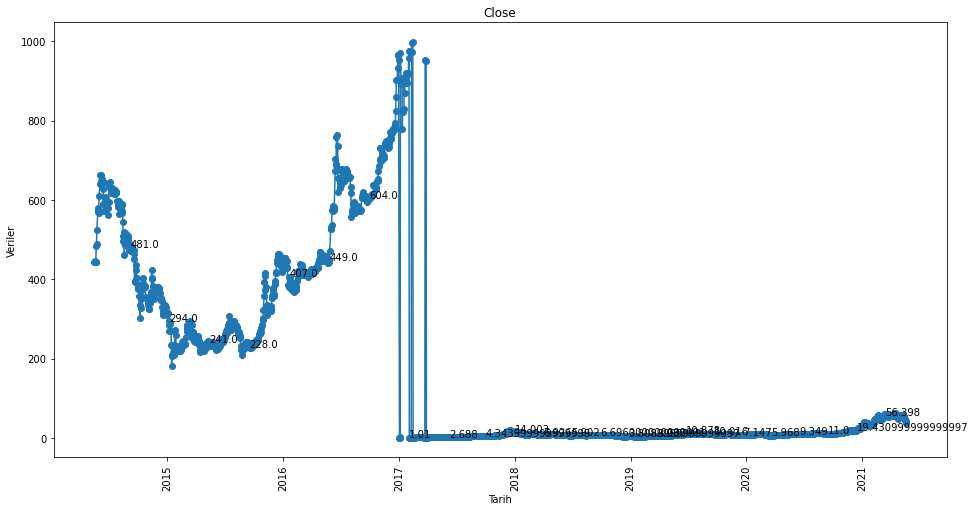

In [22]:
for i,col in enumerate(data.columns.tolist()):
    plt.figure(figsize=(16,8))
    x_axis = data.index.values
    y_axis = data[col].values
    plt.plot(x_axis,y_axis,label=col,marker='o')
    plt.title(col)
    plt.xlabel('Tarih')
    plt.ylabel('Veriler')
    plt.xticks(rotation=90)
    #Her noktaya değerini yazdırmak için kod:
    counter=0
    for j,k in zip(x_axis,y_axis):
        counter+=1
        if counter %90==0:
            plt.annotate(str(k),xy=(j,k))

In [23]:
corr = data.corr()
corr

,Open,High,Low,Close
Open,1.000000,0.975365,0.975808,0.967480
High,0.975365,1.000000,0.952265,0.976054
Low,0.975808,0.952265,1.000000,0.967503
Close,0.967480,0.976054,0.967503,1.000000


<AxesSubplot:>

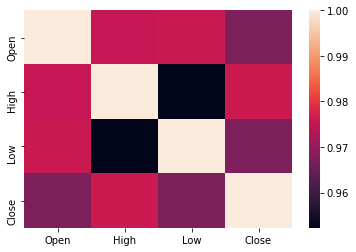

In [24]:
import seaborn as sb

sb.heatmap(corr,xticklabels=data.columns,yticklabels=data.columns)


In [25]:
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
print(data)

               Open     High      Low    Close
Date                                          
2014-05-15  436.000  445.000  436.000  444.000
2014-05-16  444.000  448.000  440.000  446.000
2014-05-19  445.000  446.000  443.000  444.000
2014-05-20  444.000  446.000  442.000  444.000
2014-05-21  444.000  494.000  443.000  483.000
...             ...      ...      ...      ...
2021-05-15   49.351   50.661   47.128   48.255
2021-05-16   48.266   49.812   43.893   44.062
2021-05-17   44.062   46.552   42.162   44.843
2021-05-18   44.853   45.816   42.539   43.318
2021-05-19   43.367   43.569   30.445   38.390

[2225 rows x 4 columns]


In [26]:
from sklearn.preprocessing import MinMaxScaler
dataset = data.values[:,0:1]
training_data = math.ceil(len(dataset) * 0.8) #verisetimizin %67'sini train için ayırıyoruz
scaler = MinMaxScaler(feature_range=(0,1))  #değerlerimizi 0-1 aralığında sıkıştırıyoruz
scaler_data = scaler.fit_transform(dataset)

train_data = scaler_data[1:training_data,0:1]

x_train = []
y_train = []

for d in range(65, len(train_data)):
    x_train.append(train_data[d-65:d, 0])
    y_train.append(train_data[d, 0])
  

x_train, y_train = np.array(x_train), np.array(y_train) #array'e çeviriyoruz.

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#print(x_train)

In [27]:
print(dataset)  #dataset'teki open sütunu değerleri

[[436.   ]
 [444.   ]
 [445.   ]
 ...
 [ 44.062]
 [ 44.853]
 [ 43.367]]


In [28]:
tf.keras.callbacks.EarlyStopping(
                          'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [42]:
# Model
model =Sequential() 
model.add(LSTM(512, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics =["accuracy"])
model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[callback])

test_data=scaler_data[training_data - 65:,:]
x_test= []
y_test= dataset[training_data:,:]

for y in range(65,len(test_data)):
  x_test.append(test_data[y-65:y,0])
x_test =np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Epoch 1/100
43/43 [==============================] - 51s 1s/step - loss: 0.0152 - accuracy: 7.2939e-04 - val_loss: 1.9683e-05 - val_accuracy: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 47s 1s/step - loss: 0.0091 - accuracy: 7.2939e-04 - val_loss: 3.7387e-06 - val_accuracy: 0.0000e+00
Epoch 3/100
43/43 [==============================] - 44s 1s/step - loss: 0.0091 - accuracy: 7.2939e-04 - val_loss: 2.3182e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
43/43 [==============================] - 52s 1s/step - loss: 0.0082 - accuracy: 7.2939e-04 - val_loss: 5.5860e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
43/43 [==============================] - 56s 1s/step - loss: 0.0087 - accuracy: 7.2939e-04 - val_loss: 5.1138e-05 - val_accuracy: 0.0000e+00


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(r2_score(y_test, predictions))

0.8693279887965266


<ipython-input-45-3d985f231918>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


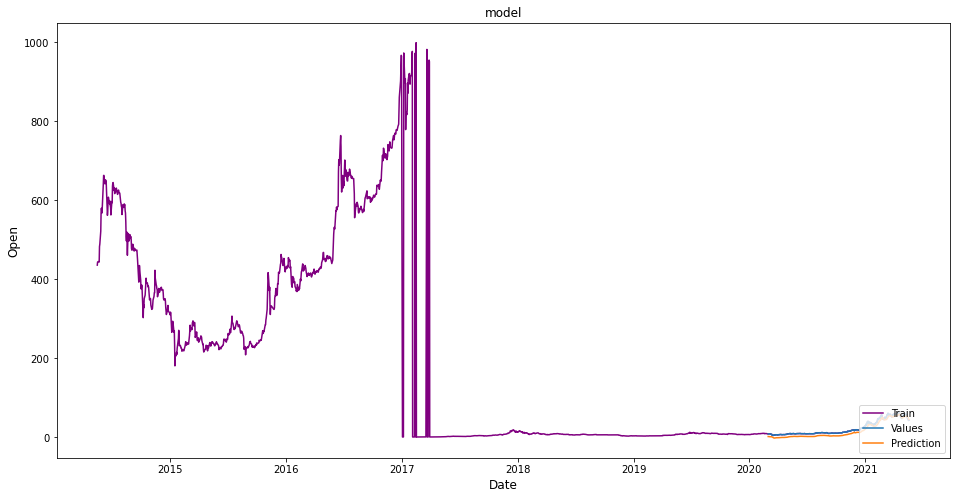

In [45]:
train = data[:training_data]
valid = data[training_data:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open', fontsize=12)
plt.plot(data['Open'],color="purple")
plt.plot(valid[['Open','Predictions']])
plt.legend(['Train','Values','Prediction'],loc='lower right')
plt.show()

<ipython-input-46-7bc011779039>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


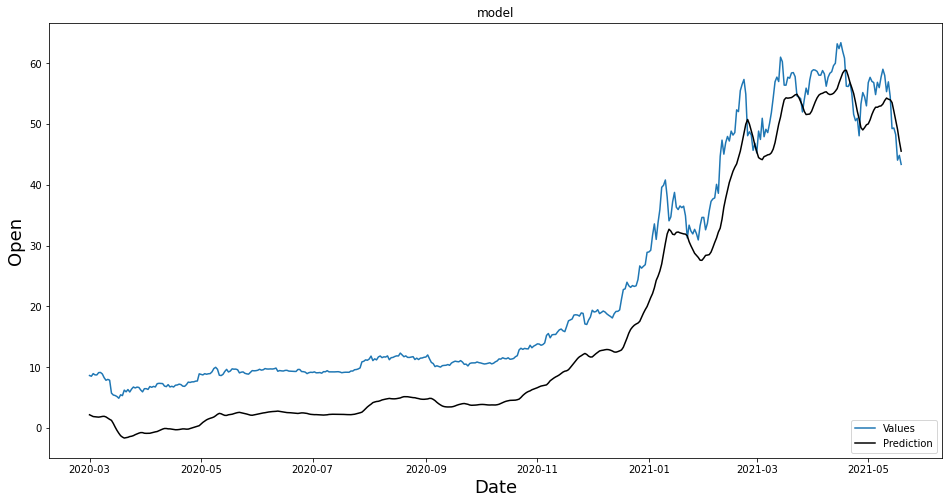

In [46]:

train = data[:training_data]
valid = data[training_data:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open', fontsize=18)
plt.plot(valid['Open'])
plt.plot(valid[["Predictions"]],color="Black")
plt.legend(['Values','Prediction'],loc='lower right')

In [47]:
dataset = data.values[:,0:1]
training_data_len = math.ceil(len(dataset) * .8)
train_data= dataset[0:training_data, :]
test_data=dataset[training_data- 65:,:]
train_data=pd.DataFrame(train_data)
train_data.rename(columns={0:'Open'}, inplace=True)
test_data=pd.DataFrame(test_data)
test_data.rename(columns={0:'Open'}, inplace=True)
total_dataset=pd.concat((train_data["Open"],test_data["Open"]),axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-65:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

real_data=[model_inputs[len(model_inputs) +1-65:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)

print(f"prediction for next day :{prediction}")

prediction for next day :[[44.000114]]


In [ ]:
# 20 Mayıs = 44.000114 buldu

In [ ]:
# Gerçek 20 Mayıs = 40.522